In [4]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "cleaned.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Display basic information and first few rows
df.info(), df.head()

# Check for missing and infinite values
missing_values = df_numeric.isnull().sum().sum()
infinite_values = np.isinf(df_numeric).sum().sum()

missing_values, infinite_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Columns: 136 entries, A1:AREA to J7.5
dtypes: float64(37), object(99)
memory usage: 1.4+ MB


(np.int64(15274), np.int64(0))

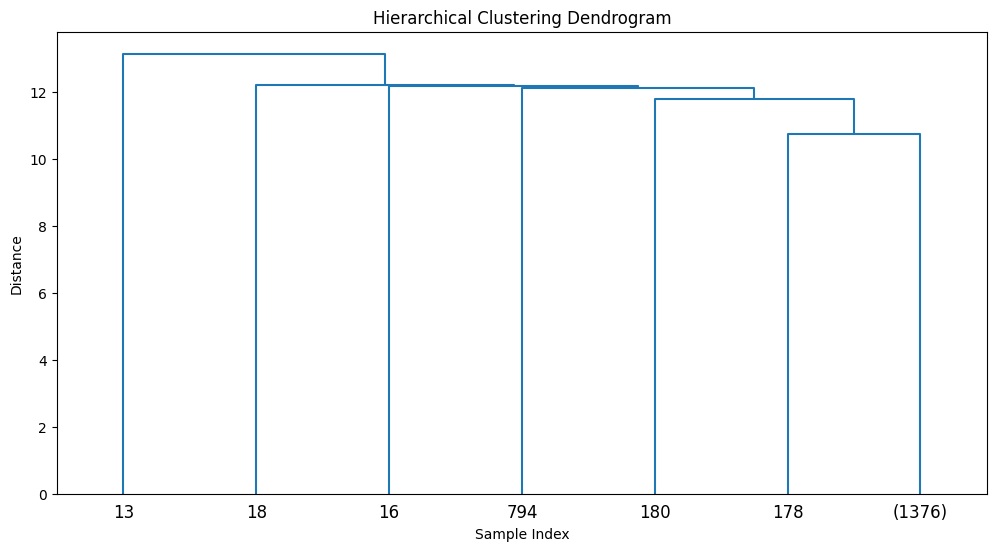

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['float64']).columns
df_numeric = df[numeric_cols]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Fill missing values with column means
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

# Standardize the data
df_scaled = scaler.fit_transform(df_numeric_filled)

# Perform hierarchical clustering
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="level", p=5)  # Show only top levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

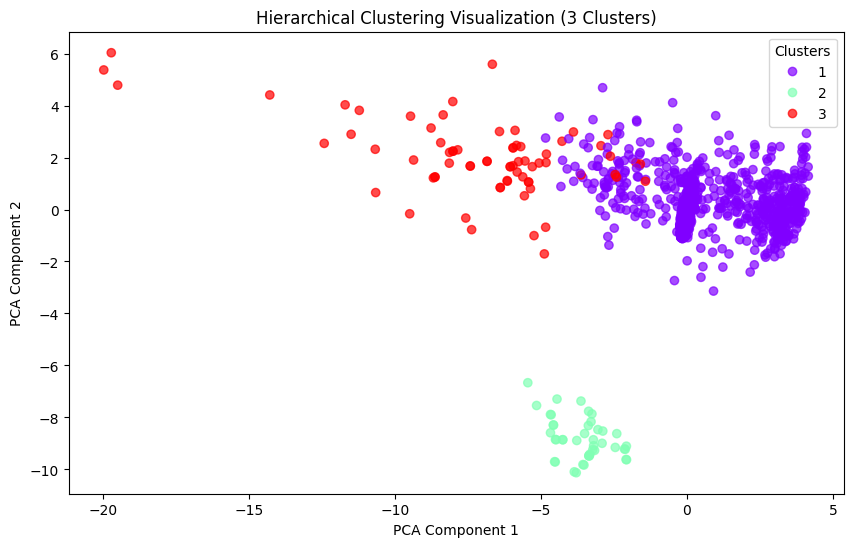

In [17]:
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

# Choose the number of clusters (let's start with 4 as an example)
num_clusters = 3

# Extract cluster labels by cutting the dendrogram at an appropriate height
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Reduce dimensions for visualization using PCA (2 components)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Hierarchical Clustering Visualization ({num_clusters} Clusters)")
plt.show()


In [18]:
import numpy as np

# Check for missing and infinite values
missing_values = df_numeric.isnull().sum().sum()
infinite_values = np.isinf(df_numeric).sum().sum()

missing_values, infinite_values

(np.int64(15274), np.int64(0))